In [9]:
from IPython.core.debugger import set_trace
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [10]:
torch.manual_seed(111)

In [11]:
train_data_length = 1024
train_data = torch.zeros((train_data_length,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
trainset = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

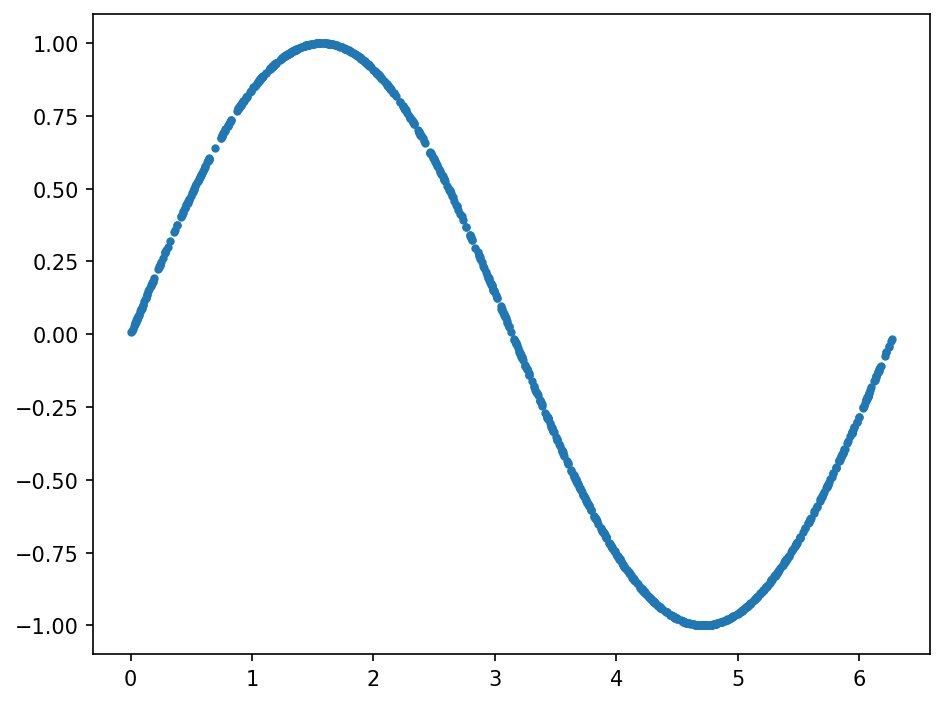

In [12]:
plt.figure(dpi=150)
plt.plot(train_data[:, 0], train_data[:, 1], '.')
plt.tight_layout()

In [13]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [14]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid())

    def forward(self, x):
        output = self.model(x)
        return output

In [15]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),)

    def forward(self, x):
        output = self.model(x)
        return output

In [16]:
discriminator = Discriminator()
generator = Generator()

In [17]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [18]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [19]:
latent_space_samples_plot = torch.randn((128, 2))

In [20]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        latent_space_samples = torch.randn((batch_size, 2))

        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2736859619617462
Epoch: 0 Loss G.: 2.264435291290283
Epoch: 10 Loss D.: 0.6698535084724426
Epoch: 10 Loss G.: 1.1330938339233398
Epoch: 20 Loss D.: 0.6319764852523804
Epoch: 20 Loss G.: 0.7881577610969543
Epoch: 30 Loss D.: 0.6162585020065308
Epoch: 30 Loss G.: 0.9278880953788757
Epoch: 40 Loss D.: 0.6733684539794922
Epoch: 40 Loss G.: 0.8603144288063049
Epoch: 50 Loss D.: 0.6039451956748962
Epoch: 50 Loss G.: 0.7899606227874756
Epoch: 60 Loss D.: 0.6101446747779846
Epoch: 60 Loss G.: 0.840460479259491
Epoch: 70 Loss D.: 0.6854737997055054
Epoch: 70 Loss G.: 0.70075923204422
Epoch: 80 Loss D.: 0.6984452605247498
Epoch: 80 Loss G.: 0.6580227613449097
Epoch: 90 Loss D.: 0.6336013674736023
Epoch: 90 Loss G.: 0.7733390927314758
Epoch: 100 Loss D.: 0.6413221955299377
Epoch: 100 Loss G.: 0.8936648368835449
Epoch: 110 Loss D.: 0.7106819748878479
Epoch: 110 Loss G.: 0.693156898021698
Epoch: 120 Loss D.: 0.6700830459594727
Epoch: 120 Loss G.: 0.7208732962608337
Epoch: 130 Lo

In [21]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

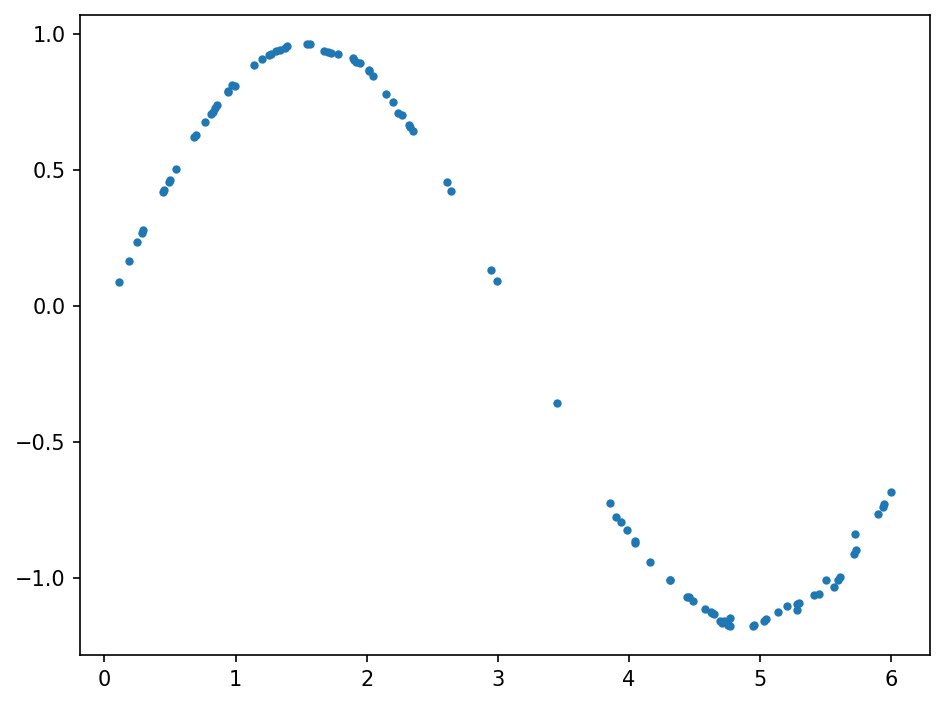

In [22]:
generated_samples = generated_samples.detach()
plt.figure(dpi=150)
plt.plot(generated_samples[:,0], generated_samples[:,1], '.')
plt.tight_layout()

In [23]:
from IPython.core.debugger import set_trace
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import math
import matplotlib.pyplot as plt
import os

In [24]:
torch.manual_seed(111)

In [25]:
device = ''
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [27]:
train_set = torchvision.datasets.MNIST(root='.',
                                      train=True,
                                      download=True,
                                      transform=transform)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:06<00:00, 1464220.05it/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 14446713.63it/s]

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2427367.84it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [28]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

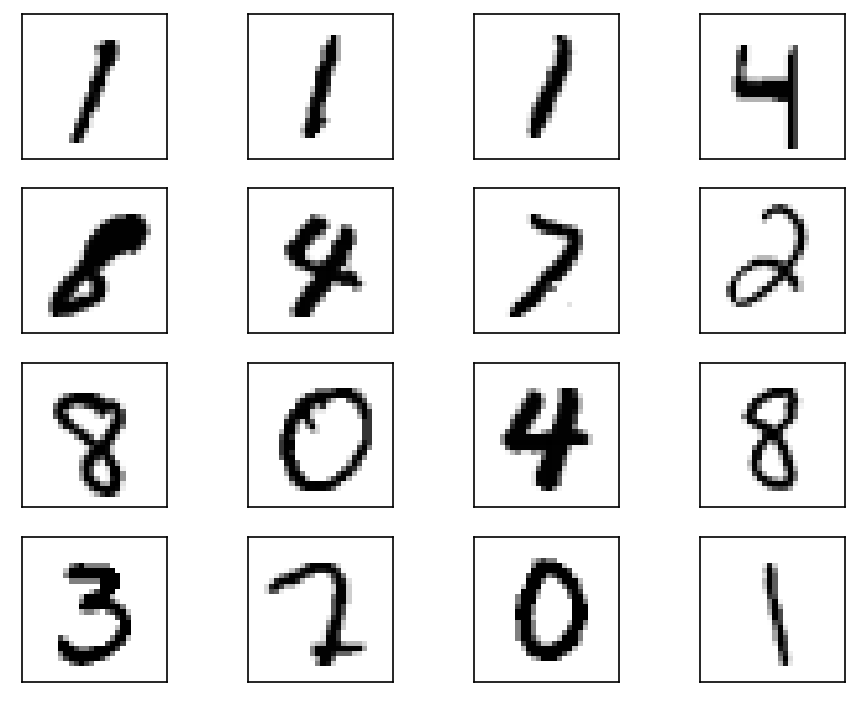

In [29]:
plt.figure(dpi=150)
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout() 

In [30]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [31]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        #x = x.view(x.size(0), 100)
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [32]:
discriminator = Discriminator().to(device=device)
generator = Generator().to(device=device)

In [33]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [34]:
latent_space_samples_plot = torch.randn((16, 100)).to(device=device)

In [ ]:
if os.path.isfile('discriminator.pt') and os.path.isfile('generator.pt'):
    discriminator.load_state_dict(torch.load('./discriminator.pt'))
    generator.load_state_dict(torch.load('./generator.pt'))   
else:
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):
            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros(
                (batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat(
                (real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()
        
            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator            
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss
            if n == batch_size - 1:
                print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5832163095474243
Epoch: 0 Loss G.: 0.4757472276687622
Epoch: 1 Loss D.: 0.10769249498844147
Epoch: 1 Loss G.: 4.086460113525391
Epoch: 2 Loss D.: 0.027094796299934387
Epoch: 2 Loss G.: 16.153135299682617
Epoch: 3 Loss D.: 0.06231358274817467
Epoch: 3 Loss G.: 5.493391036987305
Epoch: 4 Loss D.: 0.032345086336135864
Epoch: 4 Loss G.: 5.002485752105713
Epoch: 5 Loss D.: 0.06681116670370102
Epoch: 5 Loss G.: 4.553204536437988
Epoch: 6 Loss D.: 0.24933749437332153
Epoch: 6 Loss G.: 3.6634654998779297


In [ ]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)

generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.cpu().detach()

plt.figure(dpi=150)
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [ ]:
torch.save(generator.state_dict(), 'generator.pt')
torch.save(discriminator.state_dict(), 'discriminator.pt')